In [2]:
import pandas as pd

file_path = 'Downloads/CHIRPS_5_Countries_2018_2022.csv'

# Try with an alternative encoding
rainfall_df = pd.read_csv(file_path, encoding='latin1')

# Preview the data
rainfall_df.head()


,Country,Region,Year,Month,Rainfall_mm
0,Kenya,Nairobi,2018,1,25.41
1,Kenya,Nairobi,2018,2,214.89
2,Kenya,Nairobi,2018,3,218.55
3,Kenya,Nairobi,2018,4,256.78
4,Kenya,Nairobi,2018,5,291.81


In [3]:
# Basic info and preview
rainfall_df.info()
rainfall_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      900 non-null    object 
 1   Region       900 non-null    object 
 2   Year         900 non-null    int64  
 3   Month        900 non-null    int64  
 4   Rainfall_mm  900 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 35.3+ KB


,Country,Region,Year,Month,Rainfall_mm
0,Kenya,Nairobi,2018,1,25.41
1,Kenya,Nairobi,2018,2,214.89
2,Kenya,Nairobi,2018,3,218.55
3,Kenya,Nairobi,2018,4,256.78
4,Kenya,Nairobi,2018,5,291.81


In [4]:
rainfall_df['Country'].unique()
rainfall_df['Region'].unique()


array(['Nairobi', 'Kisumu', 'Mombasa', 'Addis Ababa', 'Mekelle',
       'Hawassa', 'Lilongwe', 'Blantyre', 'Mzuzu', 'Cotonou', 'Parakou',
       'Abomey', 'Abidjan', 'Bouaké', 'Korhogo'], dtype=object)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
pip install seaborn


   ---------------------------------------- 0.0/347.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/347.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/347.8 kB ? eta -:--:--
   --- ----------------------------------- 30.7/347.8 kB 325.1 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/347.8 kB 325.1 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/347.8 kB 245.8 kB/s eta 0:00:02
   ------ -------------------------------- 61.4/347.8 kB 297.7 kB/s eta 0:00:01
   ---------- ---------------------------- 92.2/347.8 kB 348.6 kB/s eta 0:00:01
   ------------ ------------------------- 112.6/347.8 kB 409.6 kB/s eta 0:00:01
   --------------- ---------------------- 143.4/347.8 kB 448.2 kB/s eta 0:00:01
   --------------------- ---------------- 194.6/347.8 kB 535.8 kB/s eta 0:00:01
   ------------------------ ------------- 225.3/347.8 kB 573.4 kB/s eta 0:00:01
   ------------------------------ ------- 276.5/347.8 kB 607.9 kB/

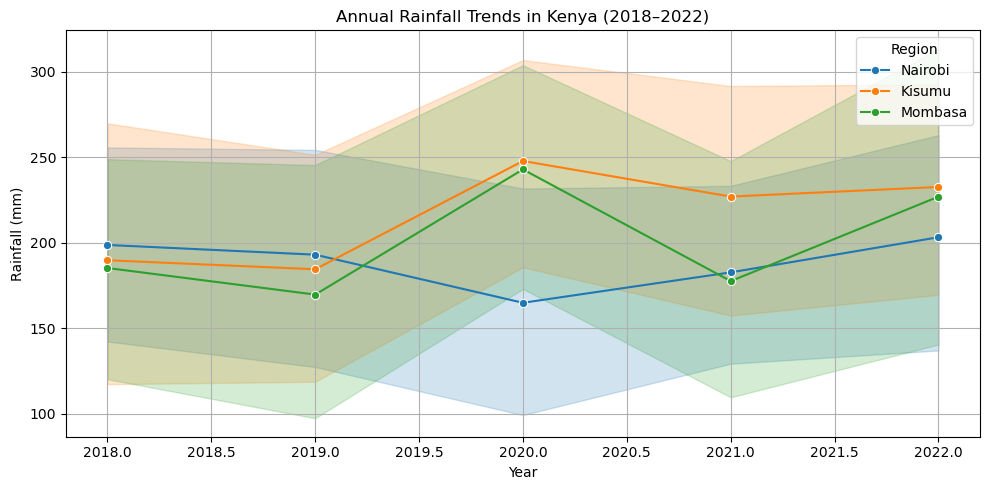

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

kenya_df = rainfall_df[rainfall_df['Country'] == 'Kenya']

plt.figure(figsize=(10, 5))
sns.lineplot(data=kenya_df, x='Year', y='Rainfall_mm', hue='Region', marker='o')
plt.title('Annual Rainfall Trends in Kenya (2018–2022)')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Summarize key insights
kenya_summary = kenya_df.groupby(['Year', 'Region'])['Rainfall_mm'].sum().reset_index()
kenya_summary.pivot(index='Year', columns='Region', values='Rainfall_mm')


Region,Kisumu,Mombasa,Nairobi
Year,,,
2018,2277.38,2222.87,2384.87
2019,2214.10,2036.18,2316.57
2020,2974.53,2915.50,1978.59
2021,2724.57,2130.84,2192.21
2022,2792.28,2723.81,2438.95


### Interpretation of Rainfall Trends (Kenya Regions, 2018–2022)

Over the five-year period:

- **Kisumu** experienced a generally increasing rainfall trend, peaking in 2020 (2,974.53 mm), followed by a slight drop in 2021 and 2022. This consistent rainfall could support stable cropping patterns and water availability.

- **Mombasa** had relatively stable rainfall between 2018 and 2022, with a peak in 2020 (2,915.50 mm) and a dip in 2019 (2,036.18 mm), suggesting occasional fluctuations that might require adaptive farming techniques like drought-resistant crops or irrigation in drier years.

- **Nairobi** saw more fluctuation. Rainfall decreased sharply in 2020 (1,978.59 mm) but recovered by 2022 (2,438.95 mm). The drop in 2020 could have negatively impacted crop yields, especially for rain-fed agriculture.

These observations highlight that while rainfall generally increased post-2020, **inter-annual variability** poses risks to agricultural planning. Farmers and local authorities must adapt practices to cope with both droughts and surpluses.


### Rainfall Variability on Crop Yields and Farming Practices

Rainfall variability across the three regions i.e. Nairobi, Kisumu, and Mombasa can significantly affect crop productivity and farming decisions:

- **Irregular rainfall patterns** (e.g., Nairobi’s drop in 2020) may lead reduced yields, especially in rain-fed agriculture.
- **Regions with increasing rainfall** (e.g., Kisumu) may benefit from enhanced soil moisture, but may also face challenges like flooding or waterlogging.
- **Unpredictable rainfall** can discourage investment in certain crops and push farmers toward short-maturity or drought-resilient varieties.
- Farmers may need to adopt **climate-smart practices** such as rainwater harvesting, irrigation systems, crop diversification, and seasonal forecasting tools.



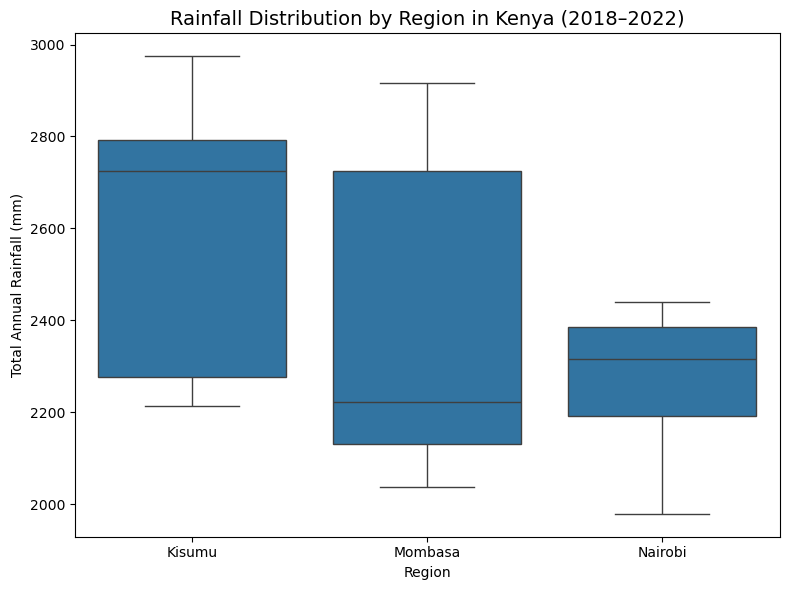

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=kenya_annual, x='Region', y='Rainfall_mm')
plt.title('Rainfall Distribution by Region in Kenya (2018–2022)', fontsize=14)
plt.ylabel('Total Annual Rainfall (mm)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


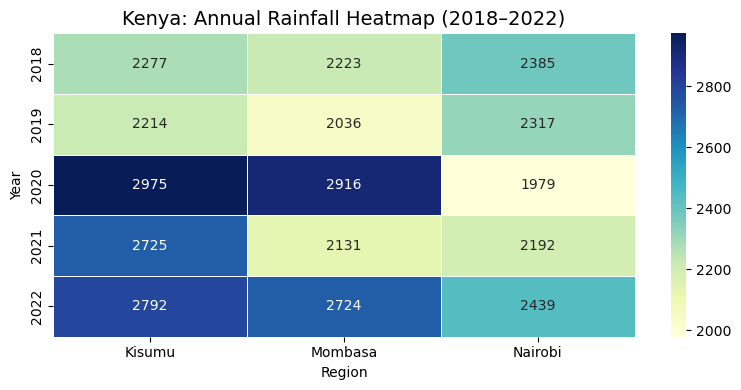

In [16]:
# Pivot for heatmap
kenya_pivot = kenya_annual.pivot(index='Year', columns='Region', values='Rainfall_mm')

plt.figure(figsize=(8, 4))
sns.heatmap(kenya_pivot, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Kenya: Annual Rainfall Heatmap (2018–2022)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


### Interpretation

- **Nairobi** experienced relatively consistent rainfall with a high in 2022.
- **Kisumu** had a increased rainfal in 2020 and stayed relatively high.
- **Mombasa** showed more fluctuation, especially between 2019 and 2020.
- **2020** appeared to have been a particularly wet year across all three regions.

This variability suggests that adaptive farming calendars and water management strategies are critical in these areas. For example, the 2020 rainfall spike might have supported higher yields, but also increased flood risk in low-lying areas like Mombasa.



## Suggested Additional Dataset

**Crop Yield Data by Region and Year**

Integrating crop yield data with rainfall patterns can help provide critical insights into how climate variability affects agricultural productivity.  Analyzing the relationship between the two,  can help with developing a better climate adaptation strategies and targeted agricultural support programs.

**Reasons for additional dataset:**
- To enables correlation between rainfall anomalies and crop output.
- To help supports adaptive farming recommendations and early warning systems.
- And to help informs policies on food security and irrigation development.



In [21]:
# Clean all string columns of special characters
for col in rainfall_df.select_dtypes(include='object').columns:
    rainfall_df[col] = rainfall_df[col].str.replace("’", "'", regex=False)



In [23]:
import warnings
warnings.filterwarnings("ignore", message="Glyph 146.*")


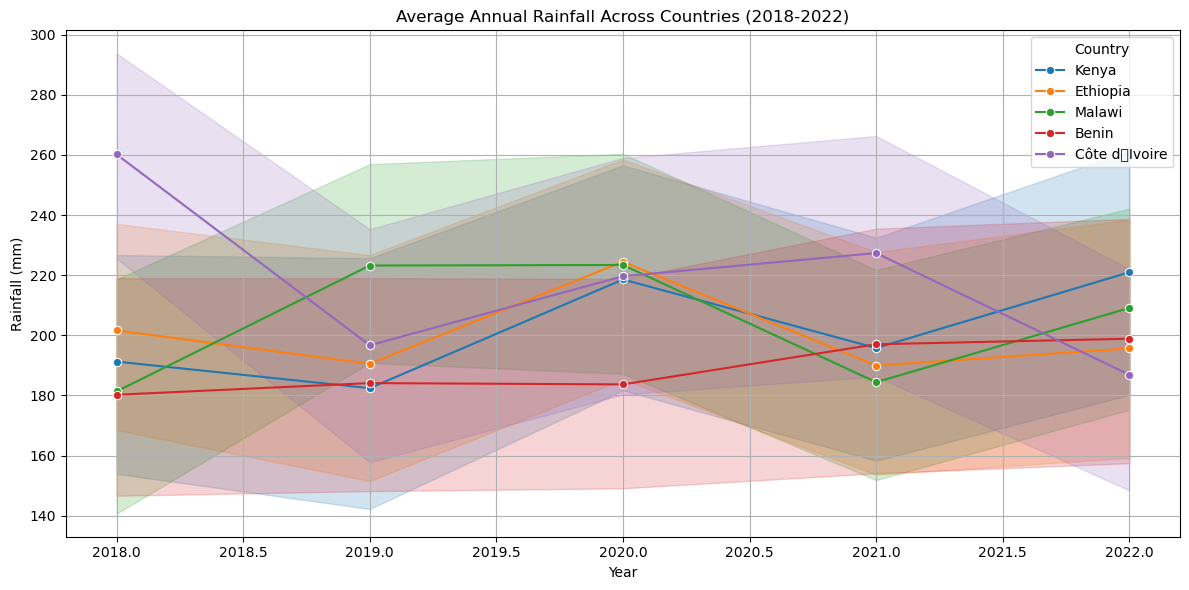

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=rainfall_df, x='Year', y='Rainfall_mm', hue='Country', estimator='mean', marker='o')

# Clean title and labels
plt.title("Average Annual Rainfall Across Countries (2018-2022)")
plt.ylabel("Rainfall (mm)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()



In [5]:
import matplotlib.pyplot as plt

# Example: simple plot
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title("Average Rainfall")

# Save directly to Downloads
plt.savefig(r"C:\Users\jedydah.atieno\Downloads\Average Annual Rainfall Across Countries (2018-2022.png")
plt.close()



<function dir>